# <span style="color:orange">Caricamento e Data Cleaning

## <span style='color:orange'>Import delle librerie e caricamento csv 

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

/tmp/ipykernel_5377/1327366475.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
df = pd.read_csv('googleplaystore.csv')

In [6]:
dfrev = pd.read_csv('googleplaystore_user_reviews.csv')

Ci sono due DataFrame:  
- df si riferisce a dati relativi intrinsecamente alle app, come il peso, il prezzo, il numero di downloads
- dfrev contiene tutte le recensioni degli utenti riguardo a un app, il sentiment della recensione (opinione positiva, negativa o neutrale), la polarità della recensione (se è molto positiva sarà pari a 1, se molto negativa -1) e la soggettività della recensione

Il secondo dataframe, però, si riferisce a un numero troppo basso di app, per cui non sarà possibile utilizzarlo all'interno dell'analisi. 
Infatti:

In [7]:
df['App'].count()

10841

In [8]:
len(dfrev['App'].unique())

1074

Il primo dataframe è relativo a 10841 app, il secondo solo a 1074, quindi al 9.9% della totalità

## <span style='color:orange'>Data Cleaning

### <span style='color:orange'>Tipi di dato e gestione dei valori nulli

#### <span style='color:orange'>Analisi sulle tipologie di dati

Vediamo come è fatto il dataframe:

In [9]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


##### <span style='color:orange'>Eliminazione delle colonne inutili</span>

Si nota che **Category** e **Genres** contengono praticamente la stessa informazione.  
Decido di eliminare **Genres** dal DataFrame.

In [10]:
df.drop(['Genres'], axis=1, inplace=True)

**Last Updated**, **Current Ver** e **Android Ver** contengono delle informazioni che non verranno utilizzate durante le analisi successive.  
Anche loro vengono eliminate:

In [11]:
df.drop(['Last Updated', 'Current Ver', 'Android Ver'], axis=1, inplace=True)

##### <span style='color:orange'>Conversione dei tipi delle colonne</span>

Controlliamo le tipologie di dati per ogni colonna:

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
dtypes: float64(1), object(8)
memory usage: 762.4+ KB


Solamente la colonna **Rating** è di una tipologia numerica.  
Volendo infatti utilizzare il metodo describe():

In [13]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


appare in output solamente quella colonna.  
Dobbiamo convertire alcune colonne per poterle utilizzare nella nostra analisi:

###### <span style='color:orange'>Conversione della colonna **Reviews**

Convertiamo la colonna **Reviews** in *int64*, così da poterla utilizzare nelle analisi:  
*N.B.: questo script è stato convertito in markdown, perché restituendo un errore blocca l'esecuzione di tutto il codice sottostante*

**df['Reviews'].astype('int64')**

*ValueError                                Traceback (most recent call last)*
*Cell In[7], line 1*
*----> 1 df['Reviews'].astype('int64')*

*ValueError: invalid literal for int() with base 10: '3.0M'*

Alcuni dati della colonna **Reviews** sono stati inseriti con l'abbreviazione in milioni, che non è possibile convertire in numero.  
Vediamo quali sono:

In [14]:
df[df['Reviews'].str.contains('M')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN


A ben vedere questa riga, non è vero che il valore in 'Size' è abbreviato in milioni. Tutti i dati sono slittati di uno ('Price' contiene il valore che ci dovrebbe essere in 'Content Rating', 'Type' contiene ciò che dovrebbe stare sotto 'Price' e così via). La sua Size dovrebbe essere pari a 19.0.  
Facciamo shiftare tutti i dati:

In [15]:
df.iloc[10472] = df.iloc[10472].shift(periods=1)
df.iloc[10472]

/tmp/ipykernel_5377/4203142353.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.9' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.iloc[10472] = df.iloc[10472].shift(periods=1)


App                                                  None
Category          Life Made WI-Fi Touchscreen Photo Frame
Rating                                                1.9
Reviews                                              19.0
Size                                                 3.0M
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content Rating                                   Everyone
Name: 10472, dtype: object

L'unico valore che non era shiftato era il nome dell'app stessa: risistemiamolo. Alla colonna **Category'** verrà assegnato il valore 'PHOTOGRAPHY'

In [16]:
df.iloc[10472] = df.iloc[10472].replace({None: 'Life Made WI-Fi Touchscreen Photo Frame', 'Life Made WI-Fi Touchscreen Photo Frame': 'PHOTOGRAPHY'})

E ora possiamo modificare il tipo di dato:

In [17]:
df['Reviews'] = df['Reviews'].astype('int64')

###### <span style='color:orange'>Conversione della colonna **Price**

Convertiamo la colonna in *float64*, assumendo che non sempre ci saranno numeri interi di prezzo:  
*N.B.: questo script è stato convertito in markdown, perché restituendo un errore blocca l'esecuzione di tutto il codice sottostante*

**df['Price'].astype('float64')**

*ValueError                                Traceback (most recent call last)*
*Cell In[11], line 1*
*----> 1 df['Price'].astype('float64')*


*ValueError: could not convert string to float: '$4.99'*

I prezzi sono stati indicati col dollaro e quindi non sono convertibili in float.  
Eliminiamo il simbolo del dollaro:

In [18]:
df['Price'] = df['Price'].replace('\$', '', regex=True)

In [19]:
df['Price'] = df['Price'].astype('float64').round(2)

###### <span style='color:orange'>Conversione della colonna **Size**

Anche **Size** potrebbe essere utile nelle analisi, ma al momento è strutturata in questo modo:
- le app che hanno peso espresso in MB hanno il suffisso 'M';
- le app che hanno peso espresso in KB hanno il suffisso 'k';
- le app che variano peso hanno la dicitura 'Varies with device'.

Per poter convertire tutto in numeri analizzabili, si potrebbe dunque procedere così:
- alle app con peso in KB verrà rimosso il suffisso e verranno moltiplicate per 1.024, per convertire in byte;
- alle app con peso in MB verrà rimosso il suffisso e verranno moltiplicate per 1024^2, per convertire in byte;
- alle app che variano in peso verrà assegnato un valore pari a 0. In questo modo verranno conservati i dati utili nelle altre colonne, ma durante le analisi riguardanti 'Size' queste righe non verranno considerate

In [20]:
def custom_convert(val):
        if 'k' in val:
            return float(val.replace('k', '')) * 1024
        elif 'M' in val:
            return float(val.replace('M', '')) * 1024**2
        elif 'Varies with device' in val:
            return float(val.replace('Varies with device', '0'))
        else:
            return float(val)
            
df['Size'] = df['Size'].apply(custom_convert)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0.0,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0.0,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0.0,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0.0,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0.0,Everyone


###### <span style='color:orange'>Conversione della colonna **Installs**

È vero che si tratta di una colonna che contiene valori qualitativi e non quantitativi, ma può valer comunque la pena di convertirli in numeri per utilizzarli nell'analisi in modo più efficace:

In [21]:
df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '').astype('int64')

###### <span style='color:orange'>Rinominare la colonna **Installs**

Preferisco che la colonna **Installs** si chiami **Downloads**, lo ritengo più intuitivo:

In [22]:
df.rename(columns={'Installs':'Downloads'}, inplace=True)

###### <span style='color:orange'>Conversione della colonna **Rating**

A seguito dello shift di valori che è stato fatto nel paragrafo *Conversione della colonna **Reviews***, **Rating** è diventato di tipo 'object' e va riconvertito in float

In [23]:
df['Rating'] = df['Rating'].astype('float64').round(1)

#### <span style='color:orange'>Gestione dei valori nulli

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  float64
 5   Downloads       10841 non-null  int64  
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  float64
 8   Content Rating  10841 non-null  object 
dtypes: float64(3), int64(2), object(4)
memory usage: 762.4+ KB


**Type** ha un valore nullo, identifichiamolo:

In [25]:
df.loc[df['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Downloads,Type,Price,Content Rating
9148,Command & Conquer: Rivals,FAMILY,NaN,0,0.0,0,NaN,0.0,Everyone 10+


In [26]:
#Sostituiamo il suo valore con 'Free'
df['Type'].fillna('Free', inplace=True)

/tmp/ipykernel_5377/932589479.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Type'].fillna('Free', inplace=True)


Dopo la rimozione di alcune righe nel paragrafo precedente, vediamo che la colonna **Rating** ha dei valori nulli.  

per quanto riguarda la colonna **Rating** ci sono  <span style='color:#8e44ad'>1474</span> valori nulli riportati come NaN:

In [27]:
df['Rating'].isnull().sum()

1474

Possiamo creare un secondo DataFrame in cui tutte queste righe verranno eliminate. Alla sezione delle analisi, vedremo quale dei due sarà meglio utilizzare.

In [28]:
df2 = df.dropna()
df2

,App,Category,Rating,Reviews,Size,Downloads,Type,Price,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,10000,Free,0.0,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,500000,Free,0.0,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,5000000,Free,0.0,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,50000000,Free,0.0,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,100000,Free,0.0,Everyone
...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2726297.6,500,Free,0.0,Everyone
10836,Sya9a Maroc - FR,FAMILY,4.5,38,55574528.0,5000,Free,0.0,Everyone
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3774873.6,100,Free,0.0,Everyone
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,0.0,1000,Free,0.0,Mature 17+


### <span style='color:orange'>Controllo dell'esistenza di duplicati

#### <span style='color:orange'>Controllo con il metodo *duplicated()*

In questo dataframe potrebbero esserci dei duplicati che compromettono l'attendibilità delle analisi.  
Proviamo a verificare la loro esistenza:

In [29]:
df.loc[df.duplicated(keep=False)].sort_index().count()

App               896
Category          896
Rating            879
Reviews           896
Size              896
Downloads         896
Type              896
Price             896
Content Rating    896
dtype: int64

Ce ne sono 577. Eliminiamoli dal DataFrame:

In [30]:
df.drop_duplicates(inplace=True, ignore_index=True)

#### <span style='color:orange'>Controllo visivo aggiuntivo

Per sicurezza, mettiamo in ordine alfabetico le app per verificare se rimane altro:

In [31]:
df.sort_values(by='App', ascending=False)

,App,Category,Rating,Reviews,Size,Downloads,Type,Price,Content Rating
772,🔥 Football Wallpapers 4K | Full HD Backgrounds 😍,ENTERTAINMENT,4.7,11661,4194304.0,1000000,Free,0.00,Everyone
7089,📏 Smart Ruler ↔️ cm/inch measuring for homework!,TOOLS,4.0,19,3355443.2,10000,Free,0.00,Everyone
2277,"💘 WhatsLov: Smileys of love, stickers and GIF",SOCIAL,4.6,22098,18874368.0,1000000,Free,0.00,Everyone
3907,💎 I'm rich,LIFESTYLE,3.8,718,27262976.0,10000,Paid,399.99,Everyone
5874,"뽕티비 - 개인방송, 인터넷방송, BJ방송",VIDEO_PLAYERS,NaN,414,61865984.0,100000,Free,0.00,Mature 17+
...,...,...,...,...,...,...,...,...,...
4180,/u/app,COMMUNICATION,4.7,573,55574528.0,10000,Free,0.00,Mature 17+
4085,.R,TOOLS,4.5,259,207872.0,10000,Free,0.00,Everyone
291,- Free Comics - Comic Apps,COMICS,3.5,115,9542041.6,10000,Free,0.00,Mature 17+
8060,+Download 4 Instagram Twitter,SOCIAL,4.5,40467,23068672.0,1000000,Free,0.00,Everyone


Facciamolo anche per altre colonne:

In [32]:
df.sort_values(by='Price', ascending=False)

,App,Category,Rating,Reviews,Size,Downloads,Type,Price,Content Rating
3912,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7654604.8,10000,Paid,400.00,Everyone
4902,I am rich(premium),FINANCE,3.5,472,988160.0,5000,Paid,399.99,Everyone
4901,I am Rich!,FINANCE,3.8,93,23068672.0,1000,Paid,399.99,Everyone
3907,💎 I'm rich,LIFESTYLE,3.8,718,27262976.0,10000,Paid,399.99,Everyone
4916,I AM RICH PRO PLUS,FINANCE,4.0,36,42991616.0,1000,Paid,399.99,Everyone
...,...,...,...,...,...,...,...,...,...
3466,Asphalt 8: Airborne,GAME,4.5,8389714,96468992.0,100000000,Free,0.00,Teen
3467,PAC-MAN,GAME,4.2,685450,38797312.0,100000000,Free,0.00,Everyone
3468,Basketball Stars,SPORTS,4.4,867920,47185920.0,10000000,Free,0.00,Everyone
3469,Colorfy: Coloring Book for Adults - Free,FAMILY,4.5,787107,0.0,10000000,Free,0.00,Everyone


In [33]:
df.sort_values(by='Reviews', ascending=False)

,App,Category,Rating,Reviews,Size,Downloads,Type,Price,Content Rating
2246,Facebook,SOCIAL,4.1,78158306,0.0,1000000000,Free,0.0,Teen
3497,Facebook,SOCIAL,4.1,78128208,0.0,1000000000,Free,0.0,Teen
303,WhatsApp Messenger,COMMUNICATION,4.4,69119316,0.0,1000000000,Free,0.0,Everyone
3458,WhatsApp Messenger,COMMUNICATION,4.4,69109672,0.0,1000000000,Free,0.0,Everyone
2305,Instagram,SOCIAL,4.5,66577446,0.0,1000000000,Free,0.0,Teen
...,...,...,...,...,...,...,...,...,...
8388,PAY DT,BUSINESS,NaN,0,5557452.8,1,Free,0.0,Everyone
8116,DN Managed Mobility App,BUSINESS,NaN,0,3565158.4,50,Free,0.0,Everyone
5657,CE BF,LIFESTYLE,NaN,0,25165824.0,50,Free,0.0,Everyone
9586,Rejoin Your Ex,SOCIAL,NaN,0,30408704.0,100,Free,0.0,Everyone


E qui si vede una cosa interessante.  
Ci sono delle App che hanno lo stesso nome, la stessa dimensione, lo stesso numero di installazioni, lo stesso rating ma un numero di reviews leggermente diverso oppure una categoria differente.  
La probabilità che si tratti della medesima app è altissima, perciò possiamo fare una seconda pulizia considerando solo alcune colonne da passare alla funzione:

In [34]:
df.drop_duplicates(subset=['App', 'Rating', 'Size', 'Downloads', 'Price', 'Content Rating'], inplace=True)

### <span style='color:orange'>Ricerca di errori nel typing

Guardiamo i valori unici delle colonne riportanti stringhe, per assicurarci che non siano presenti typos.  
La colonna **App** verrà ignorata: assumendo che i valori siano tutti unici, anche se ci fossero dei typos non altererebbero il risultato delle analisi.

In [35]:
#Category
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [36]:
#Content_Rating
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

### <span style='color:orange'>Ricerca degli outliers

Cerchiamo di capire se nel nostro dataframe esistono degli outliers.  
Anzitutto, realizziamo dei whisker plot di **Reviews**, **Size** e **Price** per avere una visualizzazione grafica.  
Non ha senso plottare il rating, visto che è in un intervallo compreso tra 0 e 5.

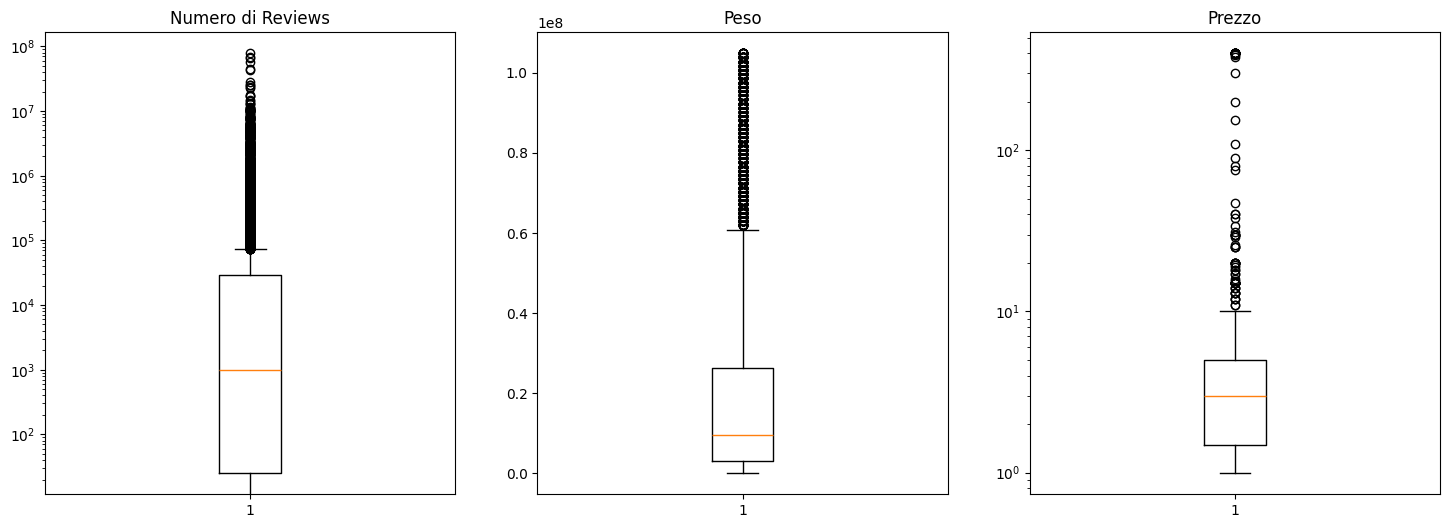

In [37]:
#Creazione degli array da includere nei grafici
reviews_whisker = np.asarray(df['Reviews'])
size_whisker = np.asarray(df['Size'])
price_whisker = np.asarray(df.loc[df['Price'] > 0, 'Price']) #non considero le app gratuite, che schiacciano in basso il whisker plot

fig, ax = plt.subplots(1, 3, figsize=(18, 6))
ax[0].boxplot(reviews_whisker)
ax[0].set_title('Numero di Reviews')
ax[0].set_yscale('log')

ax[1].boxplot(size_whisker)
ax[1].set_title('Peso')

ax[2].boxplot(price_whisker)
ax[2].set_title('Prezzo')
ax[2].set_yscale('log')


plt.show()

Iniziamo dalle **Reviews**.  
Nonostante ci siano molti valori al di fuori del boxplot, la loro esistenza è giustificabile: si tratta di applicazioni che hanno avuto moltissimo successo.  
La loro presenza può essere indicativa del comportamento reale del fenomeno che stiamo analizzando, perciò questi outlier non verranno eliminati.

Per sicurezza, vediamo se ci sono delle app che hanno un numero di reviews superiore al numero di installazioni:

In [38]:
df.loc[df['Reviews']>df['Downloads']]

,App,Category,Rating,Reviews,Size,Downloads,Type,Price,Content Rating
2173,KBA-EZ Health Guide,MEDICAL,5.0,4,26214400.0,1,Free,0.00,Everyone
4094,RMEduS - 음성인식을 활용한 R 프로그래밍 실습 시스템,FAMILY,NaN,4,67108864.0,1,Free,0.00,Everyone
4207,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,0.0,10000,Paid,2.49,Everyone
5354,AX Watch for WatchMaker,PERSONALIZATION,NaN,2,243712.0,1,Paid,0.99,Everyone
5459,Ra Ga Ba,GAME,5.0,2,20971520.0,1,Paid,1.49,Everyone
6048,Sam.BN Pro,TOOLS,NaN,11,2097152.0,10,Paid,0.99,Everyone
6233,Brick Breaker BR,GAME,5.0,7,19922944.0,5,Free,0.00,Everyone
6932,Trovami se ci riesci,GAME,5.0,11,6396313.6,10,Free,0.00,Everyone
8119,DN Blog,SOCIAL,5.0,20,4404019.2,10,Free,0.00,Teen
8614,DZ Puzzle,FAMILY,NaN,14,49283072.0,10,Paid,0.99,Everyone


Ricordandoci che **Downloads** indica solamente una base di partenza (quindi, **Downloads**=10 vuol dire che l'app è stata installata tra le 10 e le 100 volte), non ci sono elementi da segnalare

Passando a **Size**, anche qui non ci sono valori ingiustificabili e quindi tutti i dati verranno mantenuti.

Infine, per il controllo degli outlier in **Price** mettiamo in evidenza le app più costose:

In [39]:
df.sort_values(by='Price', ascending=False).head(15)

,App,Category,Rating,Reviews,Size,Downloads,Type,Price,Content Rating
3912,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7654604.8,10000,Paid,400.00,Everyone
9452,I'm Rich/Eu sou Rico/أنا غني/我很有錢,LIFESTYLE,NaN,0,41943040.0,0,Paid,399.99,Everyone
4902,I am rich(premium),FINANCE,3.5,472,988160.0,5000,Paid,399.99,Everyone
4916,I AM RICH PRO PLUS,FINANCE,4.0,36,42991616.0,1000,Paid,399.99,Everyone
4905,I Am Rich Pro,FAMILY,4.4,201,2831155.2,5000,Paid,399.99,Everyone
4901,I am Rich!,FINANCE,3.8,93,23068672.0,1000,Paid,399.99,Everyone
3907,💎 I'm rich,LIFESTYLE,3.8,718,27262976.0,10000,Paid,399.99,Everyone
4894,I am rich,LIFESTYLE,3.8,3547,1887436.8,100000,Paid,399.99,Everyone
4897,I am Rich Plus,FAMILY,4.0,856,9122611.2,10000,Paid,399.99,Everyone
4899,I Am Rich Premium,FINANCE,4.1,1867,4928307.2,50000,Paid,399.99,Everyone


Si tratta di app che hanno un motivo per cui costano così tanto (visto il loro nome), ma potremmo fare un'ulteriore verifica ignorando tutte le app che contengano la parola 'rich':

In [40]:
df[~df['App'].str.lower().str.contains('rich')].sort_values(by='Price', ascending=False).head(20)

,App,Category,Rating,Reviews,Size,Downloads,Type,Price,Content Rating
3744,most expensive app (H),FAMILY,4.3,6,1572864.0,100,Paid,399.99,Everyone
9435,Eu Sou Rico,FINANCE,NaN,0,1468006.4,0,Paid,394.99,Everyone
9237,EP Cook Book,MEDICAL,NaN,0,3355443.2,0,Paid,200.00,Everyone
6225,cronometra-br,PRODUCTIVITY,NaN,0,5662310.4,0,Paid,154.99,Everyone
6157,BP Fitness Lead Scanner,EVENTS,NaN,0,7025459.2,1,Paid,109.99,Everyone
9248,Lean EQ,BUSINESS,NaN,6,10485760.0,10,Paid,89.99,Everyone
1995,Vargo Anesthesia Mega App,MEDICAL,4.6,92,33554432.0,1000,Paid,79.99,Everyone
2122,Language Therapy: Aphasia,MEDICAL,NaN,10,29360128.0,1000,Paid,74.99,Everyone
6099,Dr.Dice - Sic bo analyzer,FAMILY,NaN,2,8912896.0,10,Paid,46.99,Everyone
3681,Norwegian For Kids & Babies F,FAMILY,NaN,0,14680064.0,5,Paid,39.99,Everyone


Assumiamo che tutte queste app riportino un prezzo corretto, non vedendo particolari stranezze

## <span style='color:orange'>Salvataggio del csv ripulito

Una volta fatti tutti i passaggi di pulizia, vale la pena salvare il nuovo DataFrame in formato csv, così da poterlo ricaricare direttamente nel capitolo delle conclusioni:

In [41]:
df.to_csv('cleaned.csv')

# <span style='color:orange'>EDA e Analisi

## <span style='color:orange'>Struttura del dataframe

Rilanciamo il metodo head() per avere sottomano anche una rappresentazione grafica del DataFrame 

In [42]:
df.head()

,App,Category,Rating,Reviews,Size,Downloads,Type,Price,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,10000,Free,0.0,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,500000,Free,0.0,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,5000000,Free,0.0,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,50000000,Free,0.0,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,100000,Free,0.0,Everyone


Il Dataframe è ora composto da 8462 righe e 9 colonne

In [43]:
df.shape

(9683, 9)

Vediamo gli indicatori principali:

In [44]:
df.describe()

,Rating,Reviews,Size,Downloads,Price
count,8219.000000,9.683000e+03,9.683000e+03,9.683000e+03,9683.000000
mean,4.173257,2.171326e+05,1.866547e+07,7.796897e+06,1.096574
std,0.536758,1.830650e+06,2.253087e+07,5.371202e+07,16.831341
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,4.000000,2.500000e+01,3.040870e+06,1.000000e+03,0.000000
50%,4.300000,9.750000e+02,9.542042e+06,1.000000e+05,0.000000
75%,4.500000,2.950000e+04,2.621440e+07,1.000000e+06,0.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000


***Rating***:  
Salta all'occhio che la media e la mediana delle recensioni sono fortemente spostate verso destra (nell'intervallo da 0 a 5 stelle).  
***Reviews***:  
La media è molto più alta della mediana, addirittura superiore anche al 75esimo percentile: potrebbero esserci delle app che hanno avuto un successo incredibile, e che fanno schizzare in alto la media.  
***Size***:  
A una prima occhiata non sembra ci siano valori particolari da segnalare. Anche qui la media è più alta della mediana.  
***Downloads:***  
Vale lo stesso discorso fatto per la colonna *Reviews*.  
***Price***:  
Il fatto che il 75esimo percentile sia ancora pari a 0 denota che la maggior parte delle app presenti sono gratuite.

## <span style='color:orange'>Andamento delle variabili

Prima di tutto ricaviamo le ascisse e le ordinate dei 5 grafici che vogliamo comporre:

In [45]:
#contiamo tutti i valori unici, poi li ordiniamo dal più piccolo al più grande. Nel caso delle ascisse, generiamo un array fatto con gli indici
rating_x = np.asarray(df['Rating'].value_counts().sort_index().index)
rating_y = np.asarray(df['Rating'].value_counts().sort_index())

reviews_x = np.asarray(df['Reviews'].value_counts().sort_index().index)
reviews_y = np.asarray(df['Reviews'].value_counts().sort_index())

size_x = np.asarray(df['Size'].value_counts().sort_index().index)
size_y = np.asarray(df['Size'].value_counts().sort_index())

price_x = np.asarray(df['Price'].value_counts().sort_index().index)
price_y = np.asarray(df['Price'].value_counts().sort_index())

downloads_x = np.asarray(df['Downloads'].value_counts().sort_index().index.astype('str'))
downloads_y = np.asarray(df['Downloads'].value_counts().sort_index())

Plottiamo le 5 variabili per vederne la distribuzione:

Text(0, 0.5, 'Numero di App')

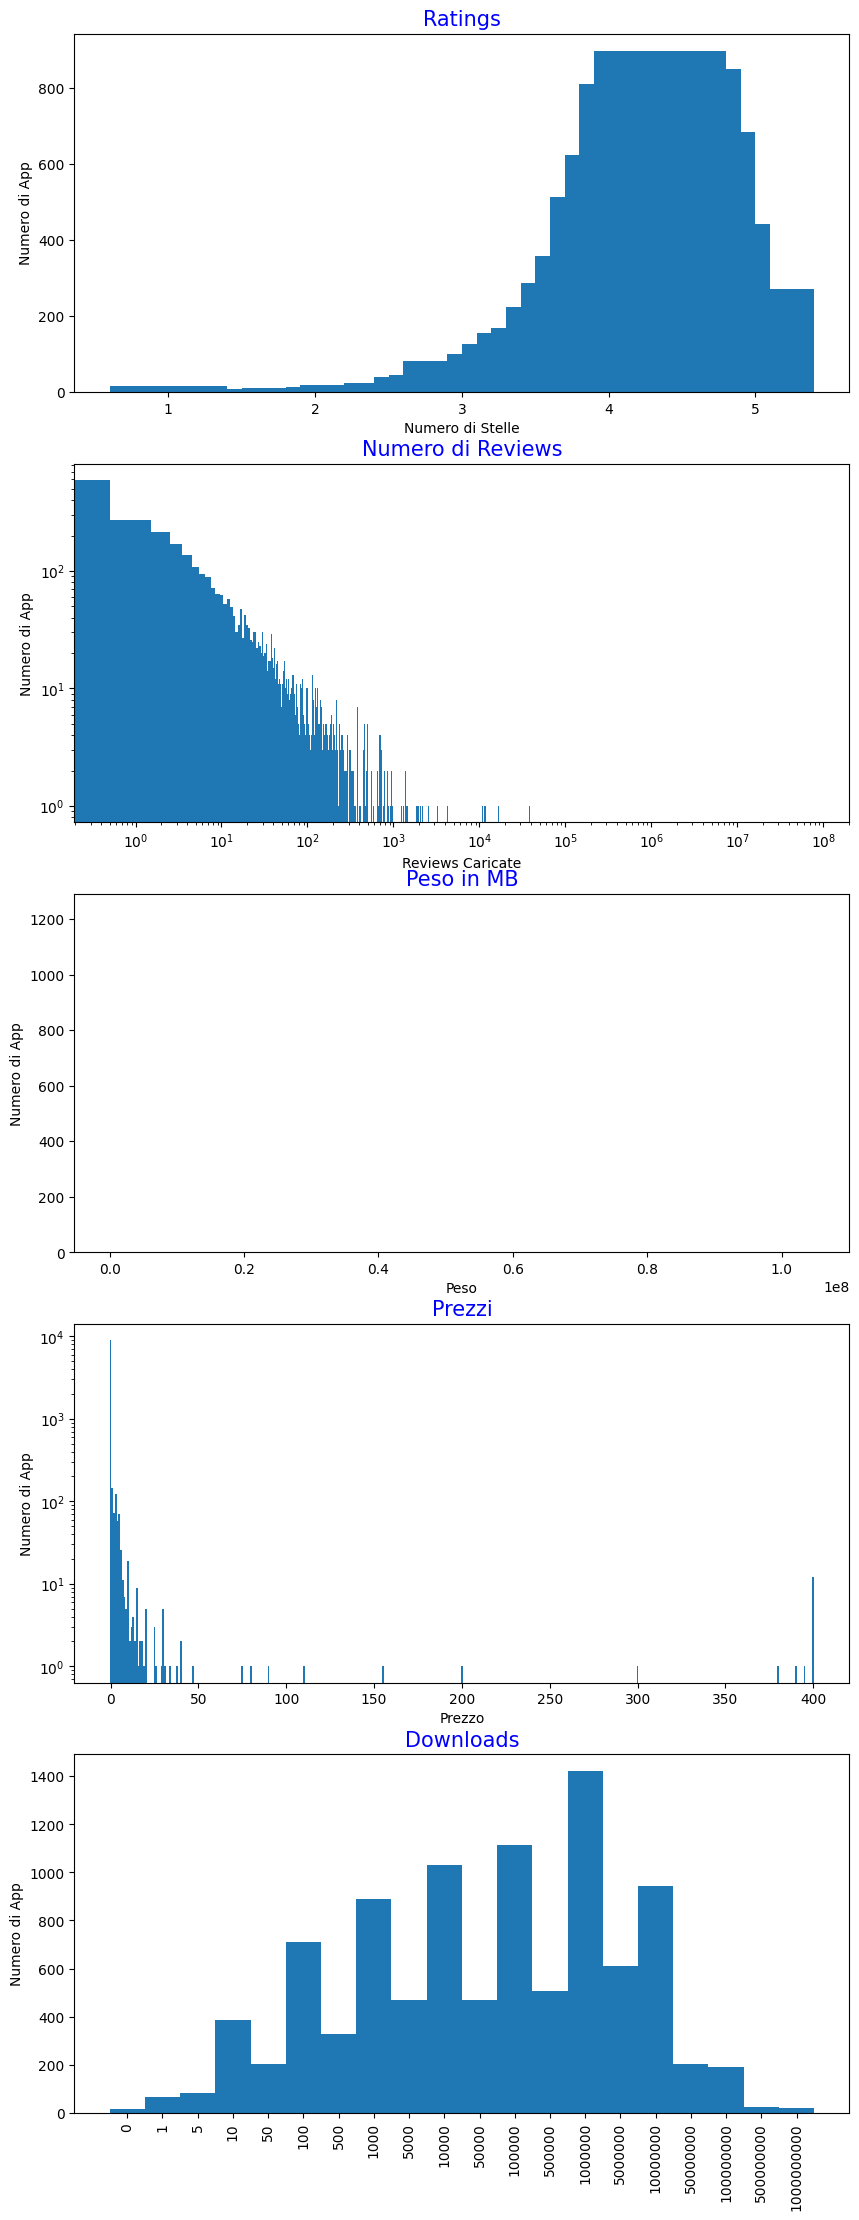

In [46]:
fig, ax = plt.subplots(5, 1, figsize=(10,27))

ax[0].bar(rating_x, rating_y)
ax[0].set_title('Ratings', fontsize = 15, color='b')
ax[0].set_xlabel('Numero di Stelle')
ax[0].set_ylabel('Numero di App')

ax[1].bar(reviews_x, reviews_y, width=1)
ax[1].set_title('Numero di Reviews', fontsize = 15, color='b')
ax[1].set_xscale('log') #senza la scala logaritmica, il grafico diventa illeggibile
ax[1].set_yscale('log')
ax[1].set_xlabel('Reviews Caricate')
ax[1].set_ylabel('Numero di App')

ax[2].bar(size_x, size_y, width=1)
ax[2].set_title('Peso in MB', fontsize = 15, color='b')
ax[2].set_xlabel('Peso')
ax[2].set_ylabel('Numero di App')

ax[3].bar(price_x, price_y, width=1)
ax[3].set_title('Prezzi', fontsize = 15, color='b')
ax[3].set_yscale('log')
ax[3].set_xlabel('Prezzo')
ax[3].set_ylabel('Numero di App')

ax[4].bar(downloads_x, downloads_y, width=1)
ax[4].set_title('Downloads', fontsize = 15, color='b')
ax[4].set_xticks(downloads_x)
ax[4].tick_params(axis='x', rotation=90)
ax[4].set_ylabel('Numero di App')

Da questi grafici, si vede bene come nessuno segua una distribuzione normale e simmetrica, ma:
- i **Rating** sono fortemente spostati verso destra. È in effetti molto più probabile che le applicazioni ricevano un voto di 4 o 5 stelle piuttosto che di 1 o 2;
- le app tendono a essere leggere (tra 0 e 25MB). Analizzeremo se questa scelta incide sul numero di download
- le app hanno dei prezzi che raramente superano i 25 dollari, e la stragrande maggioranza sono gratuite.
- i **Downloads** sembrano seguire una distribuzione gaussiana, ma in realtà gli intervalli tra i vari dati sulle ascisse non sono equidistanti

## <span style='color:orange'>Analisi

### <span style='color:orange'>Correlazione tra variabili

Creiamo un dataset composto dalle 5 variabili numeriche in nostro possesso.   
Per fare ciò, utilizzeremo il Dataframe *df2* (quello senza i valori nulli nel rating) a cui verranno rimossi tutti i valori con una 'Size' = 0 (per i motivi visti nel paragrafo *Conversione della colonna Size*)

In [47]:
df_corr = df2.loc[df2['Size']>0].select_dtypes(include=['int64', 'float64'])

Generiamo poi una matrice di correlazione e visualizziamola

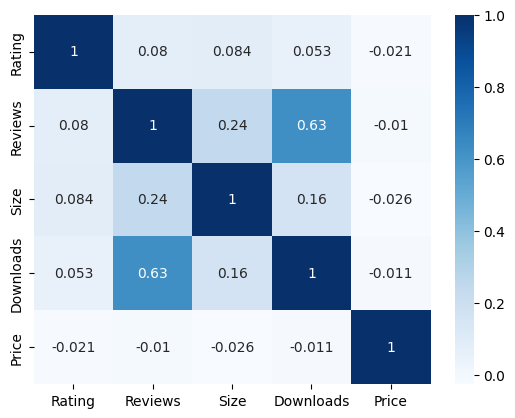

In [48]:
ax = sns.heatmap(df_corr.corr(), cmap='Blues', annot=True)

A parte la correlazione tra il numero di installazioni e il numero di review lasciate (che è ovvia), nessuna delle variabili è correlata con l'altra, né in positivo né in negativo.  
Si nota solo una leggerissima correlazione positiva tra 'Size' e 'Reviews' e tra 'Size' e 'Downloads': gli utenti potrebbero avere una piccola preferenza verso delle applicazioni più complesse e ricche di features (e quindi più pesanti).  
Nel resto dei casi, la correlazione è nulla e le variabili mutano indipendentemente.

Il prezzo, però, molto spesso è zero. Potrebbe essere interessante considerare nella correlazione solamente le applicazioni a pagamento:

In [49]:
df_corr_pagamento = df_corr.loc[df_corr['Price'] > 0]

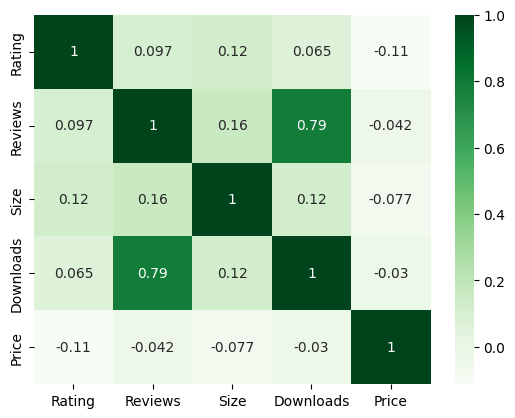

In [50]:
ax = sns.heatmap(df_corr_pagamento.corr(), cmap='Greens', annot=True)

Le cose sono rimaste più o meno come prima, per cui possiamo dire che non vi è correlazione tra le variabili quantitative.  
L'unica eccezione è la debole correlazione tra **Size** e **Reviews|Downloads** e tra **Reviews** e **Downloads**, anche se quest'ultima si tratta di una correlazione che non porta un'informazione significativa

### <span style='color:orange'>Approfondimento su **Category**

#### <span style='color:orange'>Generazione del Dataframe per l'analisi

Generiamo i due DataFrame per l'analisi: 
- df_analysis si basa su *df*
- df2_analysis si basa su *df2* (quello senza le righe con Rating nullo)

Iniziamo a calcolare il ***Numero di Applicazioni esistenti per categoria***:

In [51]:
df_app_count = df['Category'].value_counts().sort_values(ascending=False)
df2_app_count = df2['Category'].value_counts().sort_values(ascending=False)

Ricaviamo ora la **media della colonna Downloads** per ogni categoria.  
Anche se è vero che il numero indicato è solamente il limite inferiore del numero di download effettivamente eseguiti, dà comunque delle indicazioni utili.

In [52]:
df_downloads_avg = df.groupby('Category')['Downloads'].mean().round(1)
df2_downloads_avg = df2.groupby('Category')['Downloads'].mean().round(1)

Come informazione aggiuntiva possiamo anche calcolare il **numero medio di recensioni** per categoria:

In [53]:
df_reviews_avg = df.groupby('Category')['Reviews'].mean().round(1)
df2_reviews_avg = df2.groupby('Category')['Reviews'].mean().round(1)

Infine, calcoliamo anche il **rating medio** delle app, sempre divise per categoria:

In [54]:
df_rating_avg = df.groupby('Category')['Rating'].mean().round(1)
df2_rating_avg = df2.groupby('Category')['Rating'].mean().round(1)

Mettiamo insieme i dati nello stesso DataFrame per semplificarne la lettura:

In [55]:
df_analysis = pd.DataFrame({'num_App':df_app_count, 'avg_Downloads':df_downloads_avg, 'avg_Reviews':df_reviews_avg, 'avg_rating':df_rating_avg})
df2_analysis = pd.DataFrame({'num_App':df2_app_count, 'avg_Downloads':df2_downloads_avg, 'avg_Reviews':df2_reviews_avg, 'avg_rating':df2_rating_avg})

#### <span style='color:orange'>Analisi delle Categorie

##### <span style='color:orange'>Individuazione dei mercati più interessanti

Vogliamo che la nostra app sia sviluppata in categorie dove:

- Ci siano meno app concorrenti possibile
- Le app vengano tendenzialmente scaricate molto

Per questi motivi creiamo un indicatore chiamato **Convenience_index**: $$\text{Convenience index} = \frac{\text{Download medi in ogni categoria}}{\text{Numero di App presenti}*1000}$$

In [56]:
df_analysis['Convenience_index'] = df_analysis['avg_Downloads']/(df_analysis['num_App']*1000) #la divisione per 1000 è fatta ai fini di leggibilità

In [57]:
df_analysis.sort_values(by='Convenience_index', ascending=False)

,num_App,avg_Downloads,avg_Reviews,avg_rating,Convenience_index
Category,,,,,
ENTERTAINMENT,102,20722156.9,340810.3,4.1,203.158401
VIDEO_PLAYERS,164,23945138.5,411498.3,4.0,146.006942
COMMUNICATION,316,34934418.5,904521.8,4.1,110.551957
SOCIAL,239,22961790.4,953672.8,4.2,96.074437
TRAVEL_AND_LOCAL,219,13218662.8,122464.6,4.1,60.359191
PHOTOGRAPHY,284,16440664.3,372104.2,4.1,57.889663
WEATHER,79,4570892.7,155635.0,4.2,57.859401
PRODUCTIVITY,375,15461577.0,148263.6,4.2,41.230872
NEWS_AND_MAGAZINES,254,9327629.0,91063.9,4.1,36.722949


Consideriamo come possibili opzioni solo le categorie che hanno un valore di *Convenience_index* maggiore di 10

In [58]:
df_analysis_opp = df_analysis[df_analysis['Convenience_index']>10]

In [59]:
df_analysis_opp

,num_App,avg_Downloads,avg_Reviews,avg_rating,Convenience_index
Category,,,,,
ART_AND_DESIGN,64,1786532.8,22175.0,4.4,27.914575
BOOKS_AND_REFERENCE,222,7504367.5,75321.2,4.3,33.803457
COMICS,56,803234.8,41822.7,4.2,14.343479
COMMUNICATION,316,34934418.5,904521.8,4.1,110.551957
EDUCATION,119,2965983.2,112303.8,4.4,24.924229
ENTERTAINMENT,102,20722156.9,340810.3,4.1,203.158401
FOOD_AND_DRINK,113,1875210.2,55980.3,4.2,16.594781
GAME,963,14531593.4,648200.5,4.2,15.089920
HEALTH_AND_FITNESS,288,3972300.4,74171.4,4.2,13.792710


##### <span style='color:orange'>Analisi di viralità

Un secondo indicatore che possiamo creare lo chiameremo **Virality_index**.  $$\text{Virality Index}:\frac{\text{Recensioni medie per app}}{\text{Download medi per app}}$$

In [60]:
df_analysis_opp['Virality_index'] = df_analysis_opp['avg_Reviews']/df_analysis_opp['avg_Downloads']
df_analysis_opp.sort_values(by='Virality_index', ascending=False)

/tmp/ipykernel_5377/3667188500.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analysis_opp['Virality_index'] = df_analysis_opp['avg_Reviews']/df_analysis_opp['avg_Downloads']


,num_App,avg_Downloads,avg_Reviews,avg_rating,Convenience_index,Virality_index
Category,,,,,,
COMICS,56,803234.8,41822.7,4.2,14.343479,0.052068
GAME,963,14531593.4,648200.5,4.2,15.089920,0.044606
SOCIAL,239,22961790.4,953672.8,4.2,96.074437,0.041533
EDUCATION,119,2965983.2,112303.8,4.4,24.924229,0.037864
MAPS_AND_NAVIGATION,131,3841846.5,135337.0,4.0,29.327073,0.035227
PERSONALIZATION,376,4075784.0,142401.8,4.3,10.839851,0.034939
WEATHER,79,4570892.7,155635.0,4.2,57.859401,0.034049
SPORTS,325,3373767.7,108765.6,4.2,10.380824,0.032239
SHOPPING,203,6947531.0,219556.6,4.2,34.224291,0.031602


Se il **Virality_index** assume un valore alto, significa che mediamente ogni app di quella categoria riceve più recensioni, ed è quindi più probabile che diventi virale. 


Per questa ragione, tutte le categorie con **Virality_index** minore di 0.025 (valore arbitrario) saranno escluse dalle nostre opzioni

In [61]:
df_analysis = df_analysis_opp[df_analysis_opp['Virality_index']>0.025]
df_analysis

,num_App,avg_Downloads,avg_Reviews,avg_rating,Convenience_index,Virality_index
Category,,,,,,
COMICS,56,803234.8,41822.7,4.2,14.343479,0.052068
COMMUNICATION,316,34934418.5,904521.8,4.1,110.551957,0.025892
EDUCATION,119,2965983.2,112303.8,4.4,24.924229,0.037864
FOOD_AND_DRINK,113,1875210.2,55980.3,4.2,16.594781,0.029853
GAME,963,14531593.4,648200.5,4.2,15.089920,0.044606
MAPS_AND_NAVIGATION,131,3841846.5,135337.0,4.0,29.327073,0.035227
PERSONALIZATION,376,4075784.0,142401.8,4.3,10.839851,0.034939
SHOPPING,203,6947531.0,219556.6,4.2,34.224291,0.031602
SOCIAL,239,22961790.4,953672.8,4.2,96.074437,0.041533


### <span style='color:orange'>Approfondimento su **Content Rating**

Anzitutto, filtriamo il DataFrame originale considerando solo le categorie emerse nello scorso paragrafo:

In [63]:
df_cr = df[df['Category'].isin(df_analysis.index)]

Generiamo un nuovo DataFrame MultiIndex che raggruppi prima in **Category** e poi in **Content Rating**:

In [64]:
df_cr = df_cr.groupby(['Category', 'Content Rating'])

E infine creiamo le serie che andranno a comporre un nuovo DataFrame da analizzare:

In [65]:
# numero di applicazioni esistenti per sotto-categoria
num_app = df_cr['App'].count()

# media di downloads per sotto-categoria
avg_downloads = df_cr['Downloads'].mean()/1000 #divisione per 1000 fatta ai fini della leggibilità

# media di review per sotto-categoria
avg_review = df_cr['Reviews'].mean().round(1)/1000 #divisione per 1000 fatta ai fini della leggibilità

In [66]:
# generazione del nuovo DataFrame
df_cr_analysis = pd.DataFrame({'num_app':num_app, 'downloads[migliaia]':avg_downloads, 'reviews[migliaia]':avg_review})
df_cr_analysis

num_app  downloads[migliaia]  \
Category            Content Rating                                  
COMICS              Adults only 18+        2           500.000000   
                    Everyone              26           479.850000   
                    Everyone 10+           3           170.016667   
                    Mature 17+             6           368.333333   
                    Teen                  19          1515.000000   
COMMUNICATION       Everyone             281         35674.553705   
                    Mature 17+             8         22513.751250   
                    Teen                  27         30911.727778   
EDUCATION           Everyone             112          2936.625000   
                    Everyone 10+           3          7000.000000   
                    Mature 17+             3           683.333333   
                    Teen                   1          1000.000000   
FOOD_AND_DRINK      Everyone             103          1890.176126   
                    Everyone 10+           2            55.000000   
                    Teen                   8          2137.576250   
GAME                Everyone             497         17244.325040   
                    Everyone 10+         106         25140.189151   
                    Mature 17+            65          7871.110923   
                    Teen                 295          7616.991898   
MAPS_AND_NAVIGATION Everyone             127          3922.612520   
                    Everyone 10+           1             0.100000   
                    Mature 17+             1            10.000000   
                    Teen                   2          2550.000000   
PERSONALIZATION     Everyone             311          3786.358347   
                    Everyone 10+           5          2502.000000   
                    Mature 17+             9           191.223333   
                    Teen                  51          6680.516196   
SHOPPING            Everyone             173          4463.575636   
                    Mature 17+             3          5033.333333   
                    Teen                  27         23075.933333   
SOCIAL              Everyone              87          4158.331966   
                    Everyone 10+           2           505.000000   
                    Mature 17+            45         15658.244444   
                    Teen                 105         42099.638295   
SPORTS              Adults only 18+        1          1000.000000   
                    Everyone             300          3087.839660   
                    Everyone 10+           7          3651.571429   
                    Mature 17+             3          2333.333333   
                    Teen                  14          9754.400000   
TOOLS               Everyone             822          9796.468023   
                    Mature 17+             2             2.550000   
                    Teen                   5         12004.020000   
                    Unrated                1            50.000000   
WEATHER             Everyone              75          4660.006933   
                    Everyone 10+           1         10000.000000   
                    Mature 17+             1          1000.000000   
                    Teen                   2           300.000000   

                                     reviews[migliaia]  
Category            Content Rating                      
COMICS              Adults only 18+            15.6655  
                    Everyone                   24.9339  
                    Everyone 10+                3.3307  
                    Mature 17+                  5.7178  
                    Teen                       85.1663  
COMMUNICATION       Everyone                  903.0233  
                    Mature 17+                649.0534  
                    Teen                      995.8122  
EDUCATION           Everyone                  112.9519  
                    Everyone

Notiamo che ci sono sotto-categorie composte da una sola o poche app.
Non vogliamo inserirci in questi mercati, perché non essendoci abbastanza dati è rischioso.  
Includiamo solo le sotto-categorie con almeno 50 app:

In [67]:
df_cr_analysis = df_cr_analysis[df_cr_analysis['num_app']>=50]

Procediamo riapplicando lo stesso procedimento svolto per le categorie, quindi:
- utilizzeremo prima il Convenience Index per filtrare le migliori sotto-categorie
- applicheremo il Virality Index per decidere su quale sotto-categoria puntare


In [68]:
#creiamo il Convenience Index e ordiniamo i risultati dal più grande al più piccolo
df_cr_analysis['Convenience_index'] = df_cr_analysis['downloads[migliaia]']/df_cr_analysis['num_app']
df_cr_analysis.sort_values(by='Convenience_index', ascending=False)

/tmp/ipykernel_5377/1008656072.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cr_analysis['Convenience_index'] = df_cr_analysis['downloads[migliaia]']/df_cr_analysis['num_app']


,,num_app,downloads[migliaia],reviews[migliaia],Convenience_index
Category,Content Rating,,,,
SOCIAL,Teen,105,42099.638295,1843.6495,400.948936
GAME,Everyone 10+,106,25140.189151,1553.3528,237.171596
PERSONALIZATION,Teen,51,6680.516196,319.6965,130.990514
COMMUNICATION,Everyone,281,35674.553705,903.0233,126.955707
GAME,Mature 17+,65,7871.110923,454.4051,121.094014
WEATHER,Everyone,75,4660.006933,160.0827,62.133426
SOCIAL,Everyone,87,4158.331966,93.3188,47.796919
GAME,Everyone,497,17244.325040,634.9026,34.696831
MAPS_AND_NAVIGATION,Everyone,127,3922.612520,139.1380,30.886713


Prendiamo solo le sotto-categorie con un indice pari o superiore a 100:

In [69]:
df_final = df_cr_analysis.loc[df_cr_analysis['Convenience_index'] >= 100]

E poi applichiamo il Virality Index a ciò che rimane:

In [71]:
df_final['Virality_index'] = df_final['reviews[migliaia]']/df_final['downloads[migliaia]']
df_final.sort_values(by='Virality_index', ascending=False)

/tmp/ipykernel_5377/612972417.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Virality_index'] = df_final['reviews[migliaia]']/df_final['downloads[migliaia]']


num_app  downloads[migliaia]  \
Category        Content Rating                                 
GAME            Everyone 10+        106         25140.189151   
                Mature 17+           65          7871.110923   
PERSONALIZATION Teen                 51          6680.516196   
SOCIAL          Teen                105         42099.638295   
COMMUNICATION   Everyone            281         35674.553705   

                                reviews[migliaia]  Convenience_index  \
Category        Content Rating                                         
GAME            Everyone 10+            1553.3528         237.171596   
                Mature 17+               454.4051         121.094014   
PERSONALIZATION Teen                     319.6965         130.990514   
SOCIAL          Teen                    1843.6495         400.948936   
COMMUNICATION   Everyone                 903.0233         126.955707   

                                Virality_index  
Category        Content Rating                  
GAME            Everyone 10+          0.061788  
                Mature 17+            0.057731  
PERSONALIZATION Teen                  0.047855  
SOCIAL          Teen                  0.043793  
COMMUNICATION   Everyone              0.025313

Sulla base di questi risultati, la nostra app sarà sviluppata nell'ambito **Game** per un **pubblico superiore ai 10 anni**. 

### <span style='color:orange'>Impatto del costo di un'app

A partire dal DataFrame originale, filtriamo solo i valori che sono risultati nel precedente paragrafo

In [72]:
df_price = df[(df['Category'] == 'GAME') & (df['Content Rating'] == 'Everyone 10+')]

In [73]:
df_price

,App,Category,Rating,Reviews,Size,Downloads,Type,Price,Content Rating
1446,ROBLOX,GAME,4.5,4447388,70254592.0,100000000,Free,0.0,Everyone 10+
1447,Subway Surfers,GAME,4.5,27722264,79691776.0,1000000000,Free,0.0,Everyone 10+
1453,Clash Royale,GAME,4.6,23133508,101711872.0,100000000,Free,0.0,Everyone 10+
1459,Plants vs. Zombies FREE,GAME,4.4,4066989,72351744.0,100000000,Free,0.0,Everyone 10+
1463,Clash of Clans,GAME,4.6,44891723,102760448.0,100000000,Free,0.0,Everyone 10+
...,...,...,...,...,...,...,...,...,...
9893,Moto Fighter 3D,GAME,3.9,85410,40894464.0,10000000,Free,0.0,Everyone 10+
9899,Fields of Battle,GAME,4.1,71476,52428800.0,1000000,Free,0.0,Everyone 10+
9936,Fast Motorcycle Driver 2016,GAME,4.2,28151,51380224.0,1000000,Free,0.0,Everyone 10+
10299,Big Hunter,GAME,4.3,245455,88080384.0,10000000,Free,0.0,Everyone 10+


Esiste una correlazione tra la popolarità di un'app e il suo costo (gratis vs. a pagamento)?  

Della colonna **Type**, convertiamo 'Free' in 0 e 'Paid' in 1 e poi facciamo la correlazione:

In [74]:
df_price.replace({'Free':0, 'Paid':1}, inplace=True)

df_price[['Type', 'Reviews', 'Downloads']].corr()

/tmp/ipykernel_5377/1398379848.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_price.replace({'Free':0, 'Paid':1}, inplace=True)
/tmp/ipykernel_5377/1398379848.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_price.replace({'Free':0, 'Paid':1}, inplace=True)


,Type,Reviews,Downloads
Type,1.000000,-0.082626,-0.076373
Reviews,-0.082626,1.000000,0.591707
Downloads,-0.076373,0.591707,1.000000


Svolgendo una prima operazione di correlazione sembrerebbe di no.  

Proviamo però a rimuovere tutti gli outlier, e cioè tutte le applicazioni che hanno avuto tantissimo successo e che quindi hanno un grosso peso in questa analisi:

In [75]:
#Calcolo mediana, 25° percentile, 75° percentile e distanza interquartilica
mediana = df_price['Reviews'].median()
perc_25 = df_price['Reviews'].quantile(0.25)
perc_75 = df_price['Reviews'].quantile(0.75)
IQD = perc_75-perc_25
#prendo la IQD, la moltiplico per 1.5 e la aggiungo a perc_75
upper_limit = (1.5*IQD)+perc_75

#elimino dal DataFrame tutte le app che hanno un numero di reviews maggiore di upper_limit
df_price = df_price.loc[df_price['Reviews']<upper_limit]

Risvolgiamo la correlazione:

In [76]:
df_price[['Type', 'Reviews', 'Downloads']].corr()

,Type,Reviews,Downloads
Type,1.000000,-0.206860,-0.143014
Reviews,-0.206860,1.000000,0.736284
Downloads,-0.143014,0.736284,1.000000


C'è una leggera correlazione negativa: un'app gratuita ha più chance di essere installata e recensita.

Infatti, se calcoliamo la media delle reviews e dei downloads delle app gratuite e quelle a pagamento:

In [77]:
rev_free = df_price[df_price['Type']==0]['Reviews'].mean()
print(f'Media delle Reviews delle app gratuite: {rev_free.round(1)}')

down_free = df_price[df_price['Type']==0]['Downloads'].mean()
print(f'Media dei Downloads delle app gratuite: {down_free.round(1)}')

rev_paid = df_price[df_price['Type']==1]['Reviews'].mean()
print(f'Media delle Reviews delle app a pagamento: {rev_paid.round(1)}')

down_paid = df_price[df_price['Type']==1]['Downloads'].mean()
print(f'Media dei Downloads delle app a pagamento: {down_paid.round(1)}')

print(f'Rapporto tra Reviews di app gratuite e a pagamento: {rev_free/rev_paid}')
print(f'Rapporto tra Downloads di app gratuite e a pagamento: {down_free/down_paid}')

Media delle Reviews delle app gratuite: 147222.1
Media dei Downloads delle app gratuite: 6262598.2
Media delle Reviews delle app a pagamento: 9750.2
Media dei Downloads delle app a pagamento: 147444.4
Rapporto tra Reviews di app gratuite e a pagamento: 15.099363172043606
Rapporto tra Downloads di app gratuite e a pagamento: 42.47429053246825


risulta evidente come ci sia uno sbilanciamento in favore delle applicazioni gratuite.

Se consideriamo che il prezzo medio delle app a pagamento è di:

In [78]:
avg_cost = df_price[df_price['Type'] == 1]['Price'].mean().round(2)
avg_cost

3.66

Significa che a fronte di un guadagno medio di 3.66$ si copre circa solo il 2,4% dell'utenza che accede alle app gratuite.  
Non c'è una decisione giusta o sbagliata a prescindere, servirebbero maggiori dati di cui non disponiamo, come i guadagni generati dalle app gratuite. Questa evidenza verrà quindi sottoposta all'azienda cliente, che prenderà una decisione

***N.B.:*** tutti questi ragionamenti sono basati su pochi dati: in particolare, ci sono solamente 9 app a pagamento.  
Non hanno quindi una significatività statistica tale da renderli completamente attendibili.  
Possiamo utilizzarli come un'indicazione generale a cui dovrà seguire un maggior approfondimento con un dataset più fornito.

### <span style='color:orange'>Impatto delle dimensioni dell'app

Il numero di downloads è influenzato dal peso di un'applicazione?  
Proviamo a correlare i due parametri:

In [79]:
#il dataframe utilizzato sarà ancora df_price perché non è stato modificato a seguito dell'analisi sul costo
df_price[['Size', 'Downloads']].corr()

,Size,Downloads
Size,1.000000,0.042795
Downloads,0.042795,1.000000


La correlazione positiva (più un'app pesa, più viene scaricata) è molto debole, tanto da non considerarla significativa.

In [80]:
df_price[df_price['Downloads']>=100000000]

,App,Category,Rating,Reviews,Size,Downloads,Type,Price,Content Rating
3470,Lep's World 2 🍀🍀,GAME,4.3,798522,59768832.0,100000000,0,0.0,Everyone 10+


È comunque interessante notare che le applicazioni più scaricate in assoluto siano mediamente più pesanti.

In [81]:
df_price['Size'].mean()

46244506.16263737

Può quindi esserci una preferenza degli utenti verso applicazioni più complesse e ricche di features (e quindi più pesanti) che possono mantenere più attivi gli utenti nel tempo.

# <span style="color:orange">Conclusioni</span>

## <span style="color:orange">Ricerca del mercato migliore

Attraverso due indicatori che hanno tenuto in considerazione il numero medio di downloads, di recensioni e di applicazioni già presenti, sono stati filtrati i mercati che possono essere più interessanti. 
  
L'obiettivo di questa fase è decretare quale sia il mercato migliore e quale sia la fascia d'età a cui rivolgersi

Per farlo ci serviremo di un ultimo indicatore.  
Il nostro obiettivo è che la nostra applicazione venga sviluppato in un ambito in cui:
- ci sia la minor concorrenza possibile
- mediamente i downloads siano molto alti
- ci siano tante recensioni

È rischioso analizzare dei mercati in cui le app siano troppo poche, perché i dati non hanno valenza statistica e possono portare a grossi errori.  
Considereremo solo i mercati con almeno 50 applicazioni.

Il risultato è proposto nel grafico di sotto:

In [83]:
df_analysis_vir = df_analysis_opp[df_analysis_opp['Virality_index']>0.025]
df_cr = df[df['Category'].isin(df_analysis_vir.index)]
df_cr = df_cr.groupby(['Category', 'Content Rating'])
num_app = df_cr['App'].count()
avg_downloads = df_cr['Downloads'].mean()/1000 
avg_review = df_cr['Reviews'].mean().round(1)/1000 
df_cr_analysis = pd.DataFrame({'num_app':num_app, 'downloads[migliaia]':avg_downloads, 'reviews[migliaia]':avg_review})
df_cr_analysis = df_cr_analysis[df_cr_analysis['num_app']>=50]
df_cr_analysis['Convenience_index'] = df_cr_analysis['downloads[migliaia]']/df_cr_analysis['num_app']
df_final = df_cr_analysis.loc[df_cr_analysis['Convenience_index'] >= 100]
df_final['Virality_index'] = df_final['reviews[migliaia]']/df_final['downloads[migliaia]']
df_final.sort_values(by='Virality_index', ascending=False)

/tmp/ipykernel_5377/1541533037.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Virality_index'] = df_final['reviews[migliaia]']/df_final['downloads[migliaia]']


num_app  downloads[migliaia]  \
Category        Content Rating                                 
GAME            Everyone 10+        106         25140.189151   
                Mature 17+           65          7871.110923   
PERSONALIZATION Teen                 51          6680.516196   
SOCIAL          Teen                105         42099.638295   
COMMUNICATION   Everyone            281         35674.553705   

                                reviews[migliaia]  Convenience_index  \
Category        Content Rating                                         
GAME            Everyone 10+            1553.3528         237.171596   
                Mature 17+               454.4051         121.094014   
PERSONALIZATION Teen                     319.6965         130.990514   
SOCIAL          Teen                    1843.6495         400.948936   
COMMUNICATION   Everyone                 903.0233         126.955707   

                                Virality_index  
Category        Content Rating                  
GAME            Everyone 10+          0.061788  
                Mature 17+            0.057731  
PERSONALIZATION Teen                  0.047855  
SOCIAL          Teen                  0.043793  
COMMUNICATION   Everyone              0.025313

Le analisi mostrano che un'applicazione, per avere le migliori chance di successo, dovrebbe essere sviluppata in **ambito videludico per un pubblico superiore ai 10 anni**

## <span style="color:orange">Impatto del Prezzo sui downloads

Ora analizzeremo il prezzo di ogni applicazione per essere scaricata.  

Va precisato che il numero di applicazioni non è equamente distribuito tra gratuite e a pagamento, come mostra il grafico qui sotto:

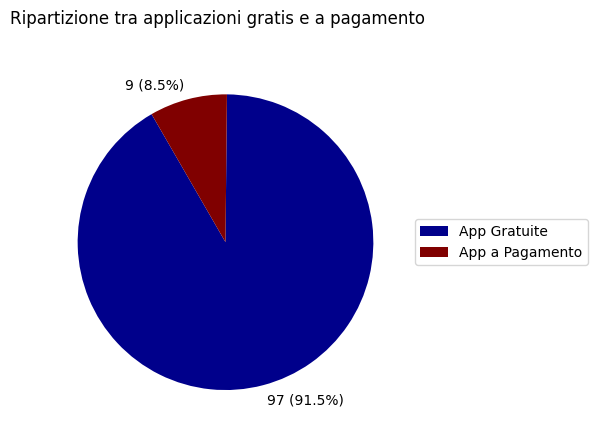

In [84]:
df_price = df[(df['Category'] == 'GAME') & (df['Content Rating'] == 'Everyone 10+')]

df_numapp_free = df_price['Price'].loc[df_price['Price']==0].count()
df_numapp_paid = df_price['Price'].loc[df_price['Price'] > 0].count()
df_numapp = [df_numapp_free, df_numapp_paid]
labels = [f'{df_numapp_free} (91.5%)', f'{df_numapp_paid} (8.5%)']
colors = ['darkblue', 'maroon']

plt.pie(df_numapp, labels=labels, startangle=120, colors=colors)
plt.suptitle('Ripartizione tra applicazioni gratis e a pagamento')
plt.legend(['App Gratuite', 'App a Pagamento'], loc='center right', bbox_to_anchor=(1, 0, 0.5, 1))

A causa della ripartizione sbilanciata e dello scarso numero delle applicazioni a pagamento, non sarà possibile dare significatività statistica a queste analisi.

Nonostante la correlazione tra il tipo di app (free o a pagamento) e il numero di recensioni e/o downloads sia nulla, possiamo notare comunque una grossa disparità di downloads e recensioni tra le applicazioni gratuite e quelle a pagamento:

Text(0.5, 1.0, 'Migliaia di Downloads')

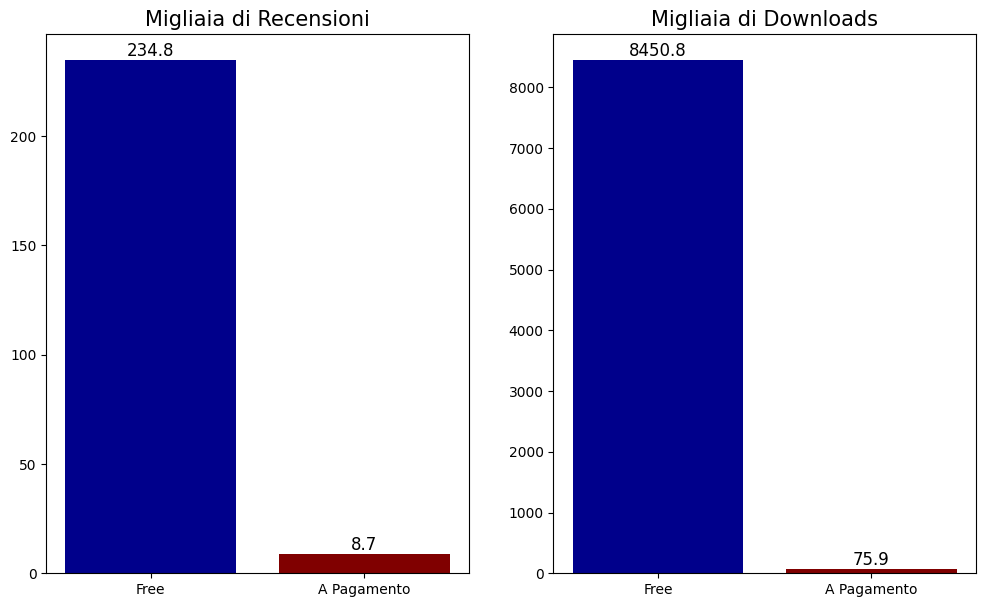

In [85]:
rev_free = df['Reviews'][df['Price'] == 0].mean()/1000
rev_paid = df['Reviews'][df['Price'] > 0].mean()/1000
reviews = [rev_free, rev_paid]
reviews_lab_x = ['Free', 'A Pagamento']

down_free = df['Downloads'][df['Price'] == 0].mean()/1000
down_paid = df['Downloads'][df['Price'] > 0].mean()/1000
downloads = [down_free, down_paid]
downloads_lab_x = ['Free', 'A Pagamento']

colors = ['darkblue', 'maroon']
fig, ax = plt.subplots(1, 2, figsize=(12, 7))

ax[0].bar(x= reviews_lab_x, height=reviews, color=colors)
ax[0].text(0, reviews[0], reviews[0].round(1), ha='center', va='bottom', fontsize='large')
ax[0].text(1, reviews[1], reviews[1].round(1), ha='center', va='bottom', fontsize='large')
ax[0].set_title('Migliaia di Recensioni', fontsize=15)

ax[1].bar(x= downloads_lab_x, height=downloads, color=colors)
ax[1].text(0, downloads[0], downloads[0].round(1), ha='center', va='bottom', fontsize='large')
ax[1].text(1, downloads[1], downloads[1].round(1), ha='center', va='bottom', fontsize='large')
ax[1].set_title('Migliaia di Downloads', fontsize=15)

Si consideri inoltre che la media del prezzo delle app a pagamento è pari a **3.74 dollari**.  
Non avendo a disposizione i guadagni medi delle applicazioni gratuite (attraverso pubblicità o acquisti in-app) non è possibile fare una considerazione accurata, e si rimanda l'analisi a ulteriori sviluppi.  
È però certo che, a fronte di 3.74$ di guadagno medio iniziale, si perde una grossissima fetta di pubblico potenziale.

## <span style="color:orange"> Impatto delle Dimensioni dell'applicazione

Nonostante non sia visibile una correlazione tra il peso di un'app e il numero di downloads, è comunque interessante notare che le applicazioni più scaricate in assoluto siano mediamente più pesanti.  
Mostriamo la tabella di tutte le app che hanno ricevuto almeno 100'000'000 di downloads e consideriamo che le app pesano mediamente 51.5MB:

In [86]:
df_price[df_price['Downloads']>=100000000]

,App,Category,Rating,Reviews,Size,Downloads,Type,Price,Content Rating
1446,ROBLOX,GAME,4.5,4447388,70254592.0,100000000,Free,0.0,Everyone 10+
1447,Subway Surfers,GAME,4.5,27722264,79691776.0,1000000000,Free,0.0,Everyone 10+
1453,Clash Royale,GAME,4.6,23133508,101711872.0,100000000,Free,0.0,Everyone 10+
1459,Plants vs. Zombies FREE,GAME,4.4,4066989,72351744.0,100000000,Free,0.0,Everyone 10+
1463,Clash of Clans,GAME,4.6,44891723,102760448.0,100000000,Free,0.0,Everyone 10+
1478,Zombie Tsunami,GAME,4.4,4920817,0.0,100000000,Free,0.0,Everyone 10+
1487,Minion Rush: Despicable Me Official Game,GAME,4.5,10216538,0.0,100000000,Free,0.0,Everyone 10+
1711,Shadow Fight 2,GAME,4.6,10979062,92274688.0,100000000,Free,0.0,Everyone 10+
1777,Jetpack Joyride,GAME,4.4,4638163,100663296.0,100000000,Free,0.0,Everyone 10+
3470,Lep's World 2 🍀🍀,GAME,4.3,798522,59768832.0,100000000,Free,0.0,Everyone 10+


Può quindi esserci una preferenza degli utenti verso applicazioni più complesse e ricche di features (e quindi più pesanti) che possono mantenere più attivi gli utenti nel tempo.

## <span style="color:orange">Riepilogo Finale

Sulla base dei dati raccolti e analizzati, il ***categoria*** dei videogiochi per persone dai 10 anni ha mostrato le caratteristiche ottimali: ci sono poche app concorrenti, i downloads sono mediamente molto alti e il tema è molto discusso.

Il ***prezzo*** non è una caratteristica che offre una chiara soluzione migliore, perché i dati non sono sufficienti per analizzare i guadagni medi delle applicazioni gratuite.  
Tuttavia, si nota che il numero di Downloads delle applicazioni gratuite è in rapporto di 176.4:1 contro quelle a pagamento.  
Successive analisi dovranno mostrare quale delle due strategie possa rivelarsi la migliore.

Per quanto riguarda le ***dimensioni***, non si nota un'evidente correlazione tra il peso dell'applicazione.  
È però da notare che tutte le applicazioni più scaricate siano mediamente pesanti. Immaginando che il peso sia correlato alla complessità di un'applicazione e la quantità di features presenti, è lecito pensare che l'utenza abbia una leggera preferenza verso software complessi e longevi.